In [1]:
pip install praw

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [275]:
import praw
import numpy as np

clientID = 'ZPtt2qKINOTtePDo2gxXxw'
secretKEY = '9ObZ47BHnAlKAn8pBAnFCNfVQDf60A'
userName = 'GigaChadicus69'
subReddit = 'tinnitus'

redditBot = praw.Reddit(client_id=clientID, client_secret=secretKEY, user_agent=userName)
subredditBot = redditBot.subreddit(subReddit)
#for post in subredditBot.new():
    #print(post.title)

import pandas as pd
post_IDs = []
post_Titles = []
post_Authors = []
post_NumComments = []
post_UpvoteRatio = []
for post in subredditBot.new():
    post_IDs.append(post.id)
    post_Titles.append(post.title)
    post_NumComments.append(post.num_comments)
    post_UpvoteRatio.append(post.upvote_ratio)
    
final_Data = {'Post ID': post_IDs,'Post Title': post_Titles,'Num Comments': post_NumComments,'Upvote Ratio':post_UpvoteRatio}
general_df = pd.DataFrame(final_Data)
general_df.head()
# Dprint(general_df.describe())

,Post ID,Post Title,Num Comments,Upvote Ratio
0,1c9xb22,Turning point in my journey: My crappy $15 pil...,6,0.96
1,1cahanh,Doctor says I don't have hearing damage so it'...,0,1.00
2,1cahbxj,Dating and T,0,1.00
3,1cakghb,Experience with specialists,0,1.00
4,1cak396,Fleeting Tinnitus - Your Experience,0,1.00


In [206]:
# soured Reddit scrapping bot library from https://www.codespeedy.com/subreddits-posts-extraction-using-python/#:~:text=Extract%20posts%20from%20any%20subreddit%20in%20Python%20using,Posts%20using%20praw%20library%20...%203%20Conclusion%20
# modified the bot as nessisary to our needs
# registerd as webdeveloper for Reddit and accessed their API so that bot could scrape posts 
# post author names were intentionally excluded to respect their aninimoty
# prawr methods found in documentation here: https://praw.readthedocs.io/en/stable/index.html



In [246]:
posts_data = []

for post in subredditBot.new():
    title = post.title
    text = post.selftext
    posts_data.append({"Title": title, "Text": text})
    
posts_df = pd.DataFrame(posts_data)
posts_df.head()

,Title,Text
0,Scared as hell - Help?,"Two weeks ago, I started to have ringing in my..."
1,Going to an event 27 SNR Customs,You reckon this is alright? Or not good? Got t...
2,I don't know how many years I can take this.,I began noticing ringing in my right ear. It's...
3,Nerve-artery collision,Hi\nI recently got an MRI Due to tinnitus. Her...
4,"on top of having tinnitus, god decided to fuck...",i dont know waht the fuck is causing the tinni...


In [207]:
# created dataframe that contains the words within the posts and their titles from web scrapper

In [247]:
def print_post(index):
    post_title = str(posts_df.iloc[index]["Title"])
    post_text = str(posts_df.iloc[index]["Text"])
    post_content = post_title + " " + post_text
    return post_content

post_content = print_post(1)
print(type(post_content))
print(post_content)

<class 'str'>
Going to an event 27 SNR Customs You reckon this is alright? Or not good? Got the highest silicon customs


In [208]:
# created this funtion to print the text of any indivdaul post that was scrapped

In [248]:
comments_data = []

for post in subredditBot.new():
    post_comments = []
    post.comments.replace_more(limit=None)
    for comment in post.comments.list():
        comment_text = comment.body
        post_comments.append(comment_text)
    comments_data.append({"Post ID": post.id, "Comments": post_comments})

comments_df = pd.DataFrame(comments_data)
comments_df.head()

,Post ID,Comments
0,1caitti,[]
1,1cai99g,"[Just want to know, its an outdoor event in te..."
2,1cai4hn,[]
3,1cahj5v,[]
4,1cagx7u,[i just went to ENT for low humming in my righ...


In [209]:
# created dataframe that contains a list of all comments tied to each post for every post

In [251]:
def print_comments(index):
    post_comments = []
    i = 0
    for post in subredditBot.new(limit = None):
        if i == index:
            post.comments.replace_more(limit = None)
            for comment in post.comments.list():
                comment_text = comment.body
                post_comments.append(comment_text)
            all_comments = ' '.join(post_comments)
            return all_comments
        i += 1 # how to itterate over a sequence in a loop found on https://stackoverflow.com/questions/760753/iterate-over-a-python-sequence-in-multiples-of-n
    return "Index Domain Error" 


comments_content = print_comments(4)
print(comments_content)

i just went to ENT for low humming in my right ear and he said it was likely because the upper back neck muscles are locked up. I sit hunched all day so this makes sense. I also have neck issues because i am a stomach sleeper and am at chiro often. better posture, stretching, and excercises will cure. Damn dude, I'm dealing with tinnitus in my left ear (paired with pressure changes, etc) and I do the same things.  I slump over my desk all day, clench the hell out of my jaw and play with my dentures, and my head is always drooped towards the computer screen.  The first ENT I saw didnt help me at all.


In [210]:
# similarly to earlier, this function serves to post all the comments tied to any post of interest.

In [202]:
for index_value in range(100):
    post_content = print_post(index_value)
    comments_content = print_comments(index_value)
    net_string_output = post_content + " " + comments_content
    #print(net_string_output)

In [213]:
# code blows up my computer if printed lol ;)
# generated a single string output that contains the text of all the post titles, post content, and comment content out of the 100 scrapped posts

In [252]:
index_value = 3  
post_content = print_post(index_value)
individual_string_outputs = print_comments(index_value)
individual_string_outputs = post_content.lower() + " " + comments_content.lower()

print(individual_string_outputs)

nerve-artery collision hi
i recently got an mri due to tinnitus. here findings with close proximity/collision of artery (pica) and vestibulocochlear nerve in transition zone on the same side. anyone else got this? relation to tinnitus? what to expect?? thanks! i just went to ent for low humming in my right ear and he said it was likely because the upper back neck muscles are locked up. i sit hunched all day so this makes sense. i also have neck issues because i am a stomach sleeper and am at chiro often. better posture, stretching, and excercises will cure. damn dude, i'm dealing with tinnitus in my left ear (paired with pressure changes, etc) and i do the same things.  i slump over my desk all day, clench the hell out of my jaw and play with my dentures, and my head is always drooped towards the computer screen.  the first ent i saw didnt help me at all.


In [215]:
# this code allows me to print the title, comment(s), and post text tied to one post as a string output
# and standardizing the casing of the outputs here with .lower() redecue errors as the outputs are fed into classification tools later. 

In [253]:
keyword_results = []

for index_value in range(100):
    post_content = print_post(index_value)
    comments_content = print_comments(index_value)
    net_string_output = post_content + " " + comments_content

    # Initialize lists for each condition evaluation
    list_for_thread_1 = []
    list_for_thread_2 = []
    list_for_thread_3 = []
    list_for_thread_4 = []
    list_for_thread_5 = []
    list_for_thread_6 = []

    # List 1: Keywords related to suicidal thoughts
    if ('suicide' in net_string_output or
        'suicidal' in net_string_output or
        'kill myself' in net_string_output or
        'I can’t do this' in net_string_output or
        'it anymore' in net_string_output or
        'die' in net_string_output or
        'death' in net_string_output or
        'I would go away' in net_string_output or
        'it all ended' in net_string_output or
        'gun(s)' in net_string_output or
        'shoot myself' in net_string_output or
        'go to bed and don’t wake up' in net_string_output or
        'fell asleep forever' in net_string_output or
        'never wake up' in net_string_output or
        'don’t wake up' in net_string_output):
        list_for_thread_1.append(-1)
    else:
        list_for_thread_1.append(0)

    # List 2: Keywords related to feelings of hopelessness
    if ('hopeless' in net_string_output or
        'hopelessness' in net_string_output or
        'never going to get better' in net_string_output or
        'never get better' in net_string_output or
        'impossible' in net_string_output or
        'lost hope' in net_string_output or
        'incurable' in net_string_output or
        'desperate' in net_string_output or
        'desperation' in net_string_output or
        'give up' in net_string_output):
        list_for_thread_2.append(-1)
    else:
        list_for_thread_2.append(0)

    # List 3: Keywords related to feelings of being ruined or depressed
    if ('ruined' in net_string_output or
        'destroyed' in net_string_output or
        'can’t study' in net_string_output or
        'can’t work' in net_string_output or
        'can’t focus' in net_string_output or
        'can’t concentrate' in net_string_output or
        'can’t sleep' in net_string_output or
        'irritable' in net_string_output or
        'depressed' in net_string_output or
        'sad' in net_string_output or
        'unhappy' in net_string_output or
        'miserable' in net_string_output or
        'stress' in net_string_output or
        'lost my job' in net_string_output or
        'lost friends' in net_string_output or
        'isolated' in net_string_output or
        'isolating' in net_string_output or
        'isolation' in net_string_output or
        'I don’t want to live' in net_string_output):
        list_for_thread_3.append(-1)
    else:
        list_for_thread_3.append(0)

    # List 4: Keywords related to worries and fears
    if ('worried' in net_string_output or
        'worry' in net_string_output or
        'fear' in net_string_output or
        'fears' in net_string_output or
        'lose my job' in net_string_output or
        'won’t graduate' in net_string_output or
        'never get better' in net_string_output or
        'won’t get better' in net_string_output or
        'won’t improve' in net_string_output or
        'never improve' in net_string_output or
        'never get better' in net_string_output):
        list_for_thread_4.append(-1)
    else:
        list_for_thread_4.append(0)

    # List 5: Keywords related to offering support and positive sentiments
    if ('feel better' in net_string_output or
        'get well' in net_string_output or
        'stay strong' in net_string_output or
        'get better' in net_string_output or
        'you got this' in net_string_output or
        'you’ll get better' in net_string_output or
        'thanks' in net_string_output or
        'thank you' in net_string_output or
        'best of luck' in net_string_output or
        'wishing you' in net_string_output or
        'good vibes' in net_string_output):
        list_for_thread_5.append(1)
    else:
        list_for_thread_5.append(0)

    # List 6: Keywords related to noticing improvements and positive changes
    if ('improved' in net_string_output or
        'got better' in net_string_output or
        'is better' in net_string_output or
        'improvement' in net_string_output or
        'notice it as much' in net_string_output or
        'not as loud' in net_string_output or
        'less loud' in net_string_output or
        'more focused' in net_string_output or
        'happier' in net_string_output or
        'much better' in net_string_output or
        'healthier' in net_string_output or
        'used to be worse' in net_string_output):
        list_for_thread_6.append(1)
    else:
        list_for_thread_6.append(0)

    # Append the results for this thread to the overall results list
    keyword_results.append([list_for_thread_1[0], list_for_thread_2[0], list_for_thread_3[0], list_for_thread_4[0], list_for_thread_5[0], list_for_thread_6[0]])

# Print the results
for i, thread_result in enumerate(keyword_results):
    print(thread_result)
    

[0, 0, -1, -1, 0, 1]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, -1, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[-1, 0, -1, 0, 0, 1]
[0, 0, -1, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, -1, -1, 1, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[-1, 0, -1, 0, 0, 1]
[-1, 0, -1, 0, 1, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, -1, -1, 0, 0]
[0, -1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[-1, 0, 0, 0, 0, 1]
[0, 0, -1, 0, 1, 0]
[0, 0, 0, 0, 0, 0]
[-1, 0, 0, -1, 0, 0]
[0, 0, 0, -1, 0, 0]
[0, 0, 0, 0, 1, 0]
[-1, 0, -1, -1, 0, 1]
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, -1, 0, 1, 0]
[0, 0, -1, 0, 1, 0]
[-1, 0, -1, 0, 1, 1]
[0, 0, -1, -1, 0, 0]
[0, 0, -1, -1, 1, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, -1, 0, 0, 0]
[0, 0, 0, -1, 0, 1]
[0, 0, 0, 0, 1, 0]
[0, 0, -1, 0, 0, 

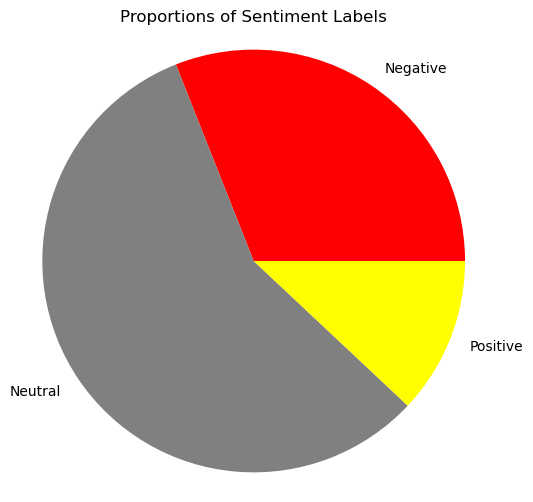

In [277]:
df = pd.DataFrame(keyword_results, columns = ['List 1', 'List 2', 'List 3', 'List 4', 'List 5', 'List 6'])
df['Scores'] = df.sum(axis = 1)
df['Label'] = df['Scores'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

df.head()

# Pie Chart
plt.figure(figsize=(6, 6))
labels = ['Negative', 'Neutral', 'Positive']
sizes = [len(df[df['Label'] == 'Negative']), len(df[df['Label'] == 'Neutral']), len(df[df['Label'] == 'Positive'])]
plt.pie(sizes, labels = labels, colors=['red', 'grey', 'yellow'])
plt.axis('equal')
plt.title('Proportions of Sentiment Labels')
plt.show()

In [270]:
# created for loop to generate lists of sub-scores for all 100 posts/comments based on if/else post classification blocks that will be used to calculate pverall scores, assign post labels, and placed into a dataframe.
# visualized labels based on assigned scores with pie chart

           List 1     List 2      List 3      List 4      List 5      List 6  \
count  100.000000  100.00000  100.000000  100.000000  100.000000  100.000000   
mean    -0.190000   -0.08000   -0.300000   -0.130000    0.200000    0.180000   
std      0.394277    0.27266    0.460566    0.337998    0.402015    0.386123   
min     -1.000000   -1.00000   -1.000000   -1.000000    0.000000    0.000000   
25%      0.000000    0.00000   -1.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
max      0.000000    0.00000    0.000000    0.000000    1.000000    1.000000   

           Scores  
count  100.000000  
mean    -0.320000  
std      0.908768  
min     -3.000000  
25%     -1.000000  
50%      0.000000  
75%      0.000000  
max      2.000000  


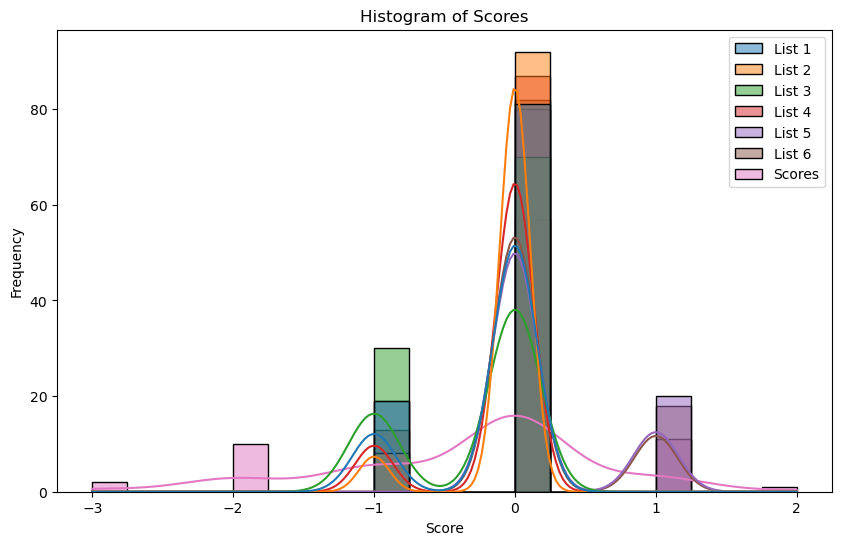

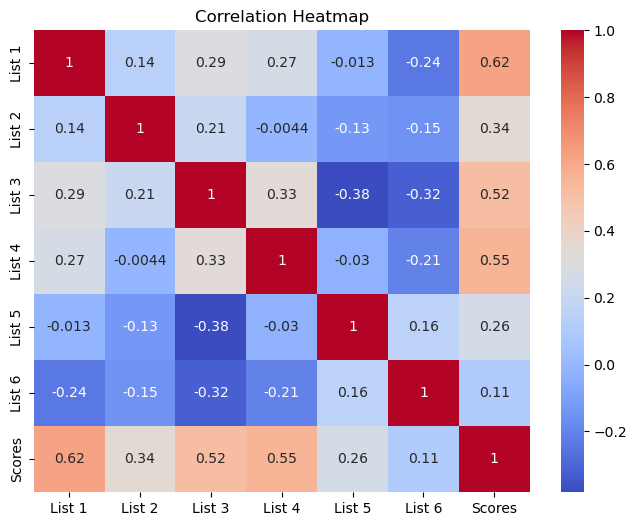

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include = ['float64', 'int64']) # Label coloumn was giveing the correlation heatmap issues due to string datatype
print(numeric_df.describe())

# Histograms and Boxplots shows how much certain language is contributing to each post/comment thread's label 
plt.figure(figsize=(10, 6))
sns.histplot(data = numeric_df, bins = 20, kde = True)
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap shows if certain words are commonly used in conjuntion with others (expecting mostly low correclation accross the board). This could be used to help adjust model
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [228]:
# the histogram/desnsity plot helps visualize what language is most considerably contributing to the scores seen and how many of each label was assigned in the end.
# the heat map allows us to see how the diferent language used may be correlated with one another. 
    # This can be heelpful to know, as improving the model will require classifying more of the language that is used in the mosts and including more synonyms to better catch specific types of language. 
    # The heat map hints at how well these synonyms may be being caught and what languge is used in conjunction with eachother. 

In [256]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
df = df.drop('Label', axis = 1)
X = df.drop('Scores', axis = 1)  # Features
y = df['Scores']  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize and train the KNN classifier
model = KNeighborsClassifier(n_neighbors = 5)  # You can adjust the number of neighbors
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred))


0.6


In [258]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#df = df.drop('Label', axis = 1)
X = df.drop('Scores', axis = 1)  # Features
y = df['Scores']  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize and train the KNN classifier
model = KNeighborsClassifier(n_neighbors = 5)  # You can adjust the number of neighbors
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred))


0.6


In [272]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv = 5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.8  0.65 0.35 0.6  0.6 ]
Mean accuracy: 0.6000000000000001


C:\Users\Damian\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [261]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNeighborsClassifier
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}  # example values for the weight function}

# Create the GridSearchCV object
grid = GridSearchCV(KNeighborsClassifier(model), param_grid, cv = 5)

# Fit the grid search object to your data
grid.fit(X, y)

# Get the best parameters and best score
best_params = grid.best_params_
best_score = grid.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

C:\Users\Damian\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.86


In [ ]:
# 